# Scipy / matplotlib tutorial

Please copy your solution of the prisoner riddle here:

In [2]:
from random import choice

def prisonser(N=50, printing=False):
        
    counter_ID = 0 # this prisoner is going to count
    counts = 0 # counter's counts (needs to become N-1)
    turns = 0 # keeps track of the number of turns (days) required
    beenthere = [0 for _ in range(N)] # keeps track of which prisoners have entered the cell
    light = False # the light is turned off at t=0

    while (counts < N-1):
        turns += 1
        prisoner=choice(range(N)) # choose a prisoner
        if prisoner!=counter_ID:
            if beenthere[prisoner]==False:
                if light==False:
                    light=True
                    beenthere[prisoner]=1
        if prisoner==counter_ID:
            if light==True:
                light=False
                counts=counts+1
        if printing:
            print( "prisoner: {}\nlight: {}\nbeen there: {}".format(prisoner, light, beenthere) )
    return(turns)

nr_prisoners = 50
turns = prisonser(N=nr_prisoners, printing=False)
print( "total turns (days) required: {}".format(turns))

total turns (days) required: 3171


How many turns are required for a population of 50 prisoners? Repeat this simulation 1000 times and plot a histogram to visualize the uncertainty.

(array([  4.,  10.,  17.,  27.,  45.,  64., 104., 122., 122., 123., 114.,
         78.,  75.,  25.,  21.,  16.,  13.,   8.,   5.,   7.]),
 array([1713.  , 1820.15, 1927.3 , 2034.45, 2141.6 , 2248.75, 2355.9 ,
        2463.05, 2570.2 , 2677.35, 2784.5 , 2891.65, 2998.8 , 3105.95,
        3213.1 , 3320.25, 3427.4 , 3534.55, 3641.7 , 3748.85, 3856.  ]),
 <BarContainer object of 20 artists>)

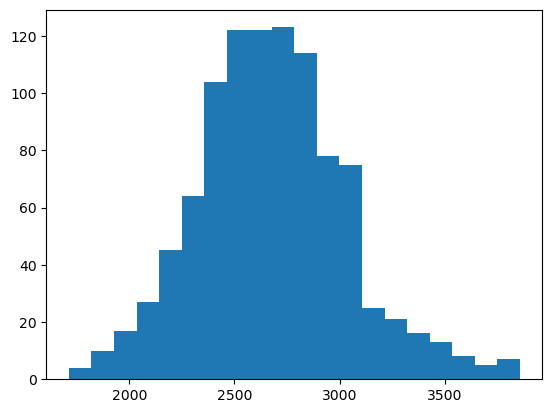

In [3]:
import numpy as np
import matplotlib.pyplot as plt

repititions = 1000
turns = np.zeros(repititions)
for i in range(repititions):
    turns[i] = prisonser(N=50, printing=False)
plt.hist(turns, bins=20)

Plot the number of required turns against the prisoner population size (ranging from 50 to 200).

Text(0, 0.5, 'Turns (#)')

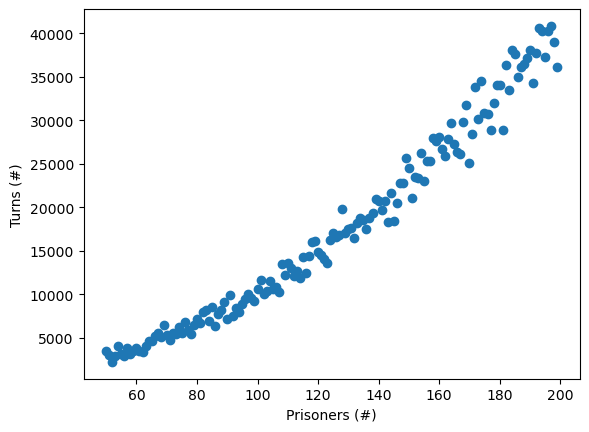

In [5]:
prisoners_nrs = np.arange(50,200)
turns = np.zeros(len(prisoners_nrs))
for i, n in enumerate(prisoners_nrs):
    turns[i] = prisonser(N=n, printing=False)
plt.scatter(prisoners_nrs, turns)
plt.xlabel('Prisoners (#)')
plt.ylabel('Turns (#)')

What kind of relationship do we see? Can you parameterize this, and fit a function?

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[ 1.12227260e+04  8.03289977e-03 -1.45362293e+04]


Text(0, 0.5, 'Turns (#)')

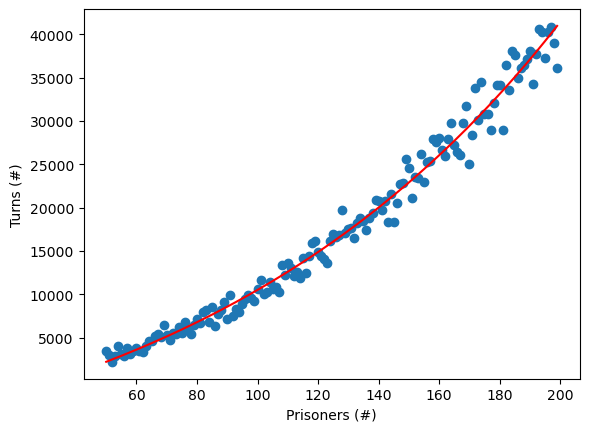

In [6]:
from scipy.optimize import curve_fit

# Have an initial guess as to what the values of the parameters are
a_guess = 100
b_guess = 0
c_guess = -100

# Fit the function a * np.exp(b * t) + c to x and y
x = prisoners_nrs
y = turns
def func(x, a, b, c):
    return a * np.exp(b * x) + c
popt, pcov = curve_fit(func, x, y, p0=(a_guess, b_guess, c_guess))
print(popt)

# What are the predicted number of turns for each prisoner population size?
a,b,c = popt
turns_fitted = a * np.exp(b * prisoners_nrs) + c

# Plot the results:
plt.scatter(prisoners_nrs, turns)
plt.plot(prisoners_nrs, turns_fitted, color='r')
plt.xlabel('Prisoners (#)')
plt.ylabel('Turns (#)')

Plot the same, but now extrapolate untill a prisoner population size of 400.

Text(0, 0.5, 'Turns (#)')

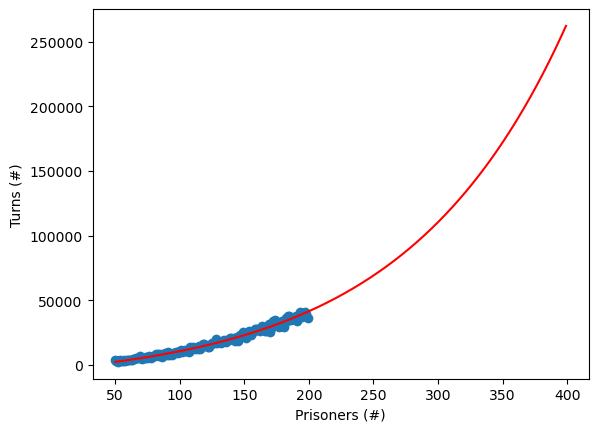

In [7]:
prisoners_nrs_extra = np.arange(50,400)
turns_fitted = a * np.exp(b * prisoners_nrs_extra) + c

plt.scatter(prisoners_nrs, turns)
plt.plot(prisoners_nrs_extra, turns_fitted, color='r')
plt.xlabel('Prisoners (#)')
plt.ylabel('Turns (#)')

# Pandas tutorial

We will work with some simulated data from a typical 2-alternative forced choice reaction time task. Subjects see two Gabors on the left and right side of the screen and have to judge which Gabor is of higher contrast. There is an easy and hard condition, which is manipulated by the signal strength: the contrast difference between the two Gabors. It is a pharmacolical study, and subjects partipate once after taking a drug, and once after taking a placebo pill.

Every row in the dataframe corresponds to one trial of the experiment. For every trial, we store the following information across the columns:
- 'subj_idx' codes for the subject identity (names)
- 'stimulus' codes for the location of higher contrast Gabor (0=left; 1=right).
- 'response' codes for the subject's choice (0=left; 1=right)
- 'rt' codes for the subjects reaction time (in seconds)
- 'signal_strength' codes for signal strength ('weak' or 'strong')
- 'drug' codes for drug condition ('placebo' or 'drug')

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

Let's first load the data:

In [11]:
df = pd.read_csv('data.csv')

Let's start with inspecting the dataframe. Print the first five row of the dataframe:

In [12]:
print(df.head())

   Unnamed: 0  subj_idx  stimulus  response     rt signal     drug
0           0         0         1         1  0.613   weak  placebo
1           1         0         1         0  0.701   weak  placebo
2           2         0         1         0  0.850   weak  placebo
3           3         0         1         1  0.555   weak  placebo
4           4         0         1         0  0.886   weak  placebo


Print the number of rows in the dataframe:


In [15]:
print(df.size)

1120000


Print all columns in the dataframe:

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'subj_idx', 'stimulus', 'response', 'rt', 'signal',
       'drug'],
      dtype='object')


Print all unique subjects in the dataframe:

In [17]:
print(df['subj_idx'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Print all unique stimuli in the dataframe:

In [18]:
print(df['stimulus'].unique())

[1 0]


Print all unique responses in the dataframe:

In [19]:
print(df['response'].unique())

[1 0]


Print all unique difficulties in the dataframe:

In [20]:
print(df['signal'].unique())

['weak' 'strong']


Print all unique drug conditions in the dataframe:

In [21]:
print(df['drug'].unique())

['placebo' 'drug']


Make a histogram of all reaction times in the dataframe:

Text(0, 0.5, '# Trials')

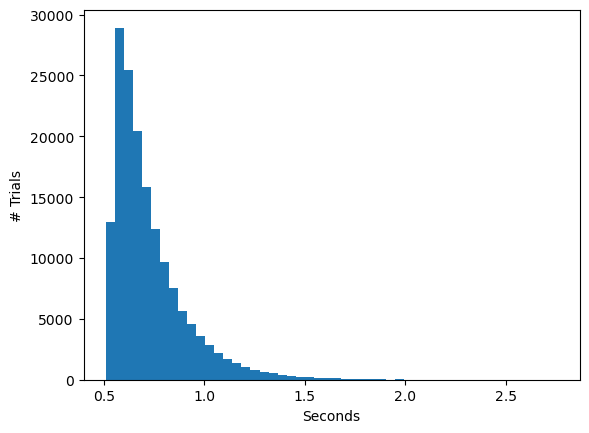

In [22]:
plt.hist(df['rt'], bins=50)
plt.xlabel('Seconds')
plt.ylabel('# Trials')

Index the dataframe by the strong signals:

In [23]:
df.loc[df['signal']=='strong',:]

,Unnamed: 0,subj_idx,stimulus,response,rt,signal,drug
4000,0,0,1,0,0.522,strong,placebo
4001,1,0,1,0,0.601,strong,placebo
4002,2,0,1,1,0.610,strong,placebo
4003,3,0,1,0,0.733,strong,placebo
4004,4,0,1,0,0.546,strong,placebo
...,...,...,...,...,...,...,...
159995,995,19,0,1,0.676,strong,drug
159996,996,19,0,1,0.786,strong,drug
159997,997,19,0,0,0.898,strong,drug
159998,998,19,0,0,0.800,strong,drug


Decisions based on strong signals are typically made a little faster than based on weak signals (in this data that is not really the case however...). Make separate histograms for the reaction times of low and high signal strength trials.

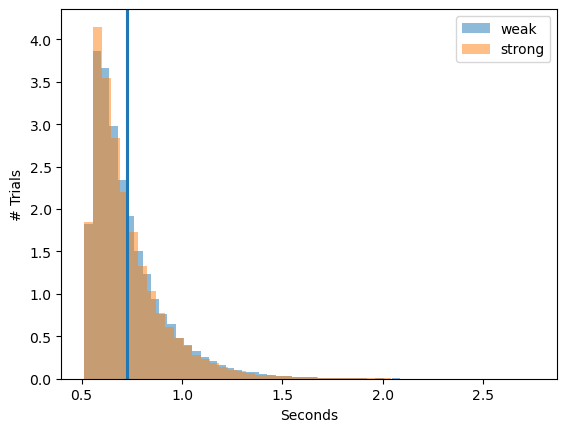

In [50]:
plt.hist(df.loc[(df['signal']=='weak'), 'rt'], 
         bins=50, density=True, alpha=0.5, label='weak')
plt.hist(df.loc[(df['signal']=='strong'), 'rt'], 
         bins=50, density=True, alpha=0.5, label='strong')
plt.axvline(df.loc[df['signal']=='weak', 'rt'].mean())
plt.axvline(df.loc[df['signal']=='strong', 'rt'].mean())
plt.xlabel('Seconds')
plt.ylabel('# Trials')
plt.legend()

Index the dataframe by the first subject:

In [25]:
df.loc[df['subj_idx']==0,:]

,Unnamed: 0,subj_idx,stimulus,response,rt,signal,drug
0,0,0,1,1,0.613,weak,placebo
1,1,0,1,0,0.701,weak,placebo
2,2,0,1,0,0.850,weak,placebo
3,3,0,1,1,0.555,weak,placebo
4,4,0,1,0,0.886,weak,placebo
...,...,...,...,...,...,...,...
7995,995,0,0,0,0.910,strong,drug
7996,996,0,0,1,0.620,strong,drug
7997,997,0,0,1,0.821,strong,drug
7998,998,0,0,0,1.539,strong,drug


Add a column that codes for whether the subject made correct response on each trial:

In [26]:
df['correct'] = (df['stimulus']==df['response']).astype(int)

With a for-loop, compute the fraction of correct trials for each subject. Add those to an empty list.

In [51]:
correct = []
for subj_idx in df['subj_idx'].unique():
    correct.append(df.loc[df['subj_idx']==subj_idx,'correct'].mean())
correct

[0.707875,
 0.72925,
 0.71225,
 0.7,
 0.703875,
 0.72275,
 0.7255,
 0.729,
 0.72575,
 0.712375,
 0.695625,
 0.7135,
 0.708125,
 0.71525,
 0.728125,
 0.720875,
 0.727,
 0.72175,
 0.729125,
 0.7165]

With a nested for-loop, compute the fraction of correct trials for each subject, each drug condition and each signal strength condition:

In [52]:
correct = []
for subj_idx in df['subj_idx'].unique():
    for d in df['drug'].unique():
        for s in df['signal'].unique():
            correct.append(df.loc[
                      ((df['subj_idx']==subj_idx) &
                      (df['drug']==d) &
                      (df['signal']==s)), 'correct'].mean())
correct

[0.6765,
 0.7095,
 0.6955,
 0.75,
 0.7195,
 0.741,
 0.7085,
 0.748,
 0.7,
 0.7205,
 0.6835,
 0.745,
 0.6955,
 0.734,
 0.678,
 0.6925,
 0.6715,
 0.706,
 0.707,
 0.731,
 0.705,
 0.7395,
 0.703,
 0.7435,
 0.6905,
 0.7335,
 0.7225,
 0.7555,
 0.7105,
 0.7315,
 0.7075,
 0.7665,
 0.699,
 0.7395,
 0.7205,
 0.744,
 0.684,
 0.723,
 0.703,
 0.7395,
 0.674,
 0.6965,
 0.6805,
 0.7315,
 0.6915,
 0.7075,
 0.701,
 0.754,
 0.6785,
 0.7265,
 0.707,
 0.7205,
 0.6815,
 0.742,
 0.7085,
 0.729,
 0.709,
 0.7555,
 0.7,
 0.748,
 0.6995,
 0.752,
 0.6985,
 0.7335,
 0.702,
 0.762,
 0.6995,
 0.7445,
 0.709,
 0.7415,
 0.697,
 0.7395,
 0.7095,
 0.757,
 0.7095,
 0.7405,
 0.6845,
 0.734,
 0.7045,
 0.743]

Which value belongs to which subject, drug condition and signal strength? Note how this is going to require a lot of bookkeeping....

With a groupby statement, compute the fraction of correct trials for each subject:

In [29]:
res = df.groupby(['subj_idx'])['correct'].mean()
print(res)

subj_idx
0     0.707875
1     0.729250
2     0.712250
3     0.700000
4     0.703875
5     0.722750
6     0.725500
7     0.729000
8     0.725750
9     0.712375
10    0.695625
11    0.713500
12    0.708125
13    0.715250
14    0.728125
15    0.720875
16    0.727000
17    0.721750
18    0.729125
19    0.716500
Name: correct, dtype: float64


With a groupby statement, compute the fraction of correct trials for each subject, each drug condition and each signal strength condition. Put the result in a new variable called 'res' and print this.

In [60]:
res = df.groupby(['subj_idx', 'drug', 'signal'])['correct'].mean()
print(res)

subj_idx  drug     signal
0         drug     strong    0.7500
                   weak      0.6955
          placebo  strong    0.7095
                   weak      0.6765
1         drug     strong    0.7480
                              ...  
18        placebo  weak      0.7095
19        drug     strong    0.7430
                   weak      0.7045
          placebo  strong    0.7340
                   weak      0.6845
Name: correct, Length: 80, dtype: float64


In [58]:
res = (df.loc[df['drug']=='drug',:].groupby(['subj_idx', 'signal'])['correct'].mean()
       - df.loc[df['drug']=='placebo',:].groupby(['subj_idx', 'signal'])['correct'].mean())
res

subj_idx  signal
0         strong    0.0405
          weak      0.0190
1         strong    0.0070
          weak     -0.0110
2         strong    0.0245
          weak     -0.0165
3         strong   -0.0415
          weak     -0.0175
4         strong    0.0250
          weak      0.0355
5         strong    0.0040
          weak     -0.0020
6         strong    0.0220
          weak      0.0320
7         strong    0.0350
          weak     -0.0030
8         strong    0.0045
          weak      0.0215
9         strong    0.0165
          weak      0.0190
10        strong    0.0350
          weak      0.0065
11        strong    0.0465
          weak      0.0095
12        strong   -0.0060
          weak      0.0285
13        strong   -0.0130
          weak      0.0270
14        strong   -0.0075
          weak     -0.0090
15        strong   -0.0185
          weak     -0.0010
16        strong   -0.0175
          weak     -0.0025
17        strong   -0.0020
          weak     -0.0120
18        s

The result is a dataframe that contains a MultiIndex. This is also known as a hierarchical index dataframe. This allows you to have multiple columns acting as a row identifier and multiple rows acting as a header identifier. With MultiIndex, you can do some sophisticated data analysis, especially for working with higher dimensional data. Accessing data is the first step when working on a MultiIndex DataFrame.

the .loc method now takes values, one for each MultiIndex. For example, we can get the accuracy scores of subject 0, in the placebo condition, and for each signal strength, with: 

```
res.loc[0, 'placebo', :]
```

Index 'res' and obtain the accuracy scores of subjects for the strong signal strength trials in the placebo sessions:

In [61]:
res.loc[:, 'placebo', 'strong']

subj_idx
0     0.7095
1     0.7410
2     0.7205
3     0.7340
4     0.7060
5     0.7395
6     0.7335
7     0.7315
8     0.7395
9     0.7230
10    0.6965
11    0.7075
12    0.7265
13    0.7420
14    0.7555
15    0.7520
16    0.7620
17    0.7415
18    0.7570
19    0.7340
Name: correct, dtype: float64

Do the same for the low signal strength trials in placebo sessions:

In [36]:
res.loc[:,'placebo', 'weak']

subj_idx
0     0.6765
1     0.7195
2     0.7000
3     0.6955
4     0.6715
5     0.7050
6     0.6905
7     0.7105
8     0.6990
9     0.6840
10    0.6740
11    0.6915
12    0.6785
13    0.6815
14    0.7090
15    0.6995
16    0.7020
17    0.7090
18    0.7095
19    0.6845
Name: correct, dtype: float64

There seems to be a difference, but is it statistically significant? Use a paired samples t-test.

In [62]:
sp.stats.ttest_rel(res.loc[:,'placebo', 'strong'], res.loc[:,'placebo', 'weak'])

Ttest_relResult(statistic=12.922052530324972, pvalue=7.348005937790151e-11)

Suppose we want to test whether there is an effect of drug condition on accuracy, but irrespective of signal strength. Now, we need to 'collapse' across signal strength; in other words, for every subject and drug condition, we need to take the mean across the two signal strengts. Do this with a two groupby statements (chained).

In [64]:
df.groupby(['subj_idx', 'drug', 'signal'])['correct'].mean().groupby(['subj_idx', 'drug']).mean()

# .groupby(['subj_idx', 'drug']).mean()
# print(res)

subj_idx  drug   
0         drug       0.72275
          placebo    0.69300
1         drug       0.72825
          placebo    0.73025
2         drug       0.71425
          placebo    0.71025
3         drug       0.68525
          placebo    0.71475
4         drug       0.71900
          placebo    0.68875
5         drug       0.72325
          placebo    0.72225
6         drug       0.73900
          placebo    0.71200
7         drug       0.73700
          placebo    0.72100
8         drug       0.73225
          placebo    0.71925
9         drug       0.72125
          placebo    0.70350
10        drug       0.70600
          placebo    0.68525
11        drug       0.72750
          placebo    0.69950
12        drug       0.71375
          placebo    0.70250
13        drug       0.71875
          placebo    0.71175
14        drug       0.72400
          placebo    0.73225
15        drug       0.71600
          placebo    0.72575
16        drug       0.72200
          placebo    0.73

Check whether there is a significant difference of drug on accuracy:

In [39]:
sp.stats.ttest_rel(res.loc[:,'drug'], res.loc[:,'placebo'])

Ttest_relResult(statistic=1.989237493828095, pvalue=0.06126812860508354)

In the Results section of your manuscript, you might want to report the grand average accury for each drug and signal strength condition. So, first you want to compute the accuracy for each subject, drug and signal strength condition, and then take the average across subjects, within each of the four cells of the design. Do this in one line: 

In [40]:
df.groupby(['subj_idx', 'drug', 'signal'])['correct'].mean().groupby(['drug', 'signal']).mean()

drug     signal
drug     strong    0.739975
         weak      0.701750
placebo  strong    0.732625
         weak      0.694550
Name: correct, dtype: float64

As rigorous scientists, we also want to report the variability across subjects. So, do the same, but now take the standard error of the mean across subjects:

In [41]:
df.groupby(['subj_idx', 'drug', 'signal'])['correct'].mean().groupby(['drug', 'signal']).sem()

drug     signal
drug     strong    0.003404
         weak      0.002545
placebo  strong    0.004023
         weak      0.003122
Name: correct, dtype: float64

Rather than taking the mean, we can apply any arbitrary function. For example,we might be interested to compute signal detection theoretic measures d' and criterion (https://en.wikipedia.org/wiki/Detection_theory). 

First, compute the total number of hits, misses, false alarms, and correct
rejects.
- Hit: when the stimulus was 1 and the subject (correctly) responded with 1
- Miss: when the stimulus was 1 and the subject (incorrectly) responded with 0
- False alarm: when the stimulus was 0 and the subject (incorrectly) responded with 1
- Correct reject: when the stimulus was 0 and the subject (correctly) responded with 0

In [42]:
n_hit = ((df['stimulus']==1)&(df['response']==1)).sum()
n_miss = ((df['stimulus']==1)&(df['response']==0)).sum()
n_fa = ((df['stimulus']==0)&(df['response']==1)).sum()
n_cr = ((df['stimulus']==0)&(df['response']==0)).sum()

Then, compute the hit-rate and false alarm-rates:
- hit_rate: fraction of hits on all stimulus==1 trials
- fa_rate: fraction of false alarm on all stimulus==0 trials

In [43]:
hit_rate = n_hit / (n_hit + n_miss)
fa_rate = n_fa / (n_fa + n_cr)

In signal detection theory, these measures are z-scored in the following way:

In [44]:
hit_rate_z = sp.stats.norm.isf(1-hit_rate)
fa_rate_z = sp.stats.norm.isf(1-fa_rate)

You can compute signal detection theoretic d' and criterion as follows:
- d': difference between z-scored hit and false alarm rates
- criterion: average of z-scored hit and false alarm rates, times -1

In [45]:
d = hit_rate_z - fa_rate_z
c = -(hit_rate_z + fa_rate_z) / 2

Now put everything in a function that takes a dataframe as input, and returns the d' and criterion

In [46]:
def sdt(df, stim_column='stimulus'):

    # counts:
    n_hit = ((df[stim_column]==1)&(df['response']==1)).sum()
    n_miss = ((df[stim_column]==1)&(df['response']==0)).sum()
    n_fa = ((df[stim_column]==0)&(df['response']==1)).sum()
    n_cr = ((df[stim_column]==0)&(df['response']==0)).sum()
        
    # rates:
    hit_rate = n_hit / (n_hit + n_miss)
    fa_rate = n_fa / (n_fa + n_cr)
    
    # z-score:
    hit_rate_z = sp.stats.norm.isf(1-hit_rate)
    fa_rate_z = sp.stats.norm.isf(1-fa_rate)
    
    # measures:
    d = hit_rate_z - fa_rate_z
    c = -(hit_rate_z + fa_rate_z) / 2

    return d, c

Apply this function to every subject, drug and signal strenth condition.

In [103]:
res = df.groupby(['subj_idx', 'signal', 'drug']).apply(sdt).apply(pd.Series)
res.columns = ['d-prime', 'criterion']
print(res)

                          d-prime  criterion
subj_idx signal drug                        
0        strong drug     1.394078  -0.257126
                placebo  1.196936   0.404244
         weak   drug     1.068800  -0.296553
                placebo  1.038692   0.504305
1        strong drug     1.368896  -0.219544
...                           ...        ...
18       weak   placebo  1.118084   0.160187
19       strong drug     1.339150  -0.226899
                placebo  1.315305   0.320498
         weak   drug     1.105988  -0.239625
                placebo  1.001329   0.288527

[80 rows x 2 columns]


Use seaborn to make boxplots of d', separately for each signal strength and drug condition.

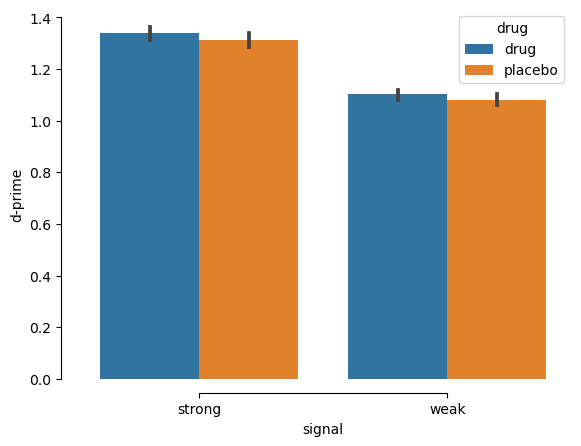

In [84]:
import seaborn as sns

sns.barplot(x="signal", y="d-prime", hue="drug",
            data=res.reset_index())
sns.despine(offset=10, trim=True)

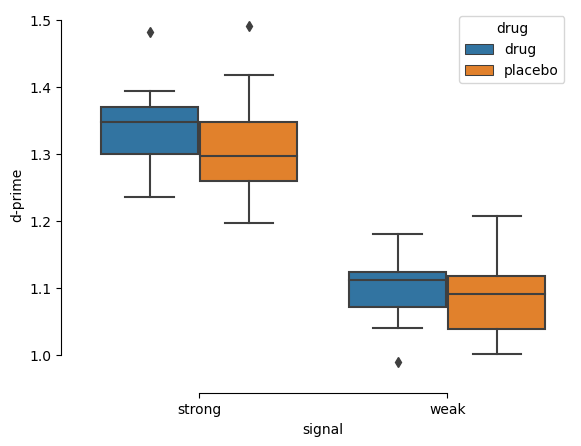

In [85]:
sns.boxplot(x="signal", y="d-prime", hue="drug",
            data=res.reset_index())
sns.despine(offset=10, trim=True)

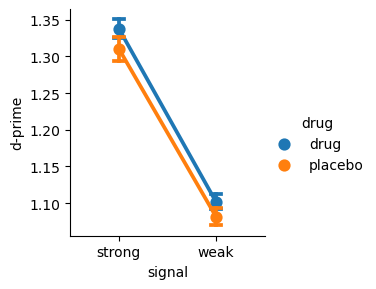

In [105]:
sns.catplot(
    data=res.reset_index(), x="signal", y="d-prime", hue="drug", units='subj_idx',
    capsize=0.1, errorbar="se",
    kind="point", height=3, aspect=1,
)


# sns.stripplot(x="signal", y="d-prime", hue='drug', data=res,
#               size=4, color=".3", linewidth=0)


Use a repeated measures ANOVA to test for main effects of signal and drug.

In [107]:
from statsmodels.stats.anova import AnovaRM

aov = AnovaRM(res.reset_index(), 'd-prime', 'subj_idx', within=['signal', 'drug']).fit()
print(aov)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  Anova
            F Value  Num DF  Den DF Pr > F
------------------------------------------
signal      796.8864 1.0000 19.0000 0.0000
drug          2.9769 1.0000 19.0000 0.1007
signal:drug   0.0495 1.0000 19.0000 0.8264



Do the same for criterion.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
signal       5.9308 1.0000 19.0000 0.0249
drug         8.6573 1.0000 19.0000 0.0084
signal:drug  1.9041 1.0000 19.0000 0.1836



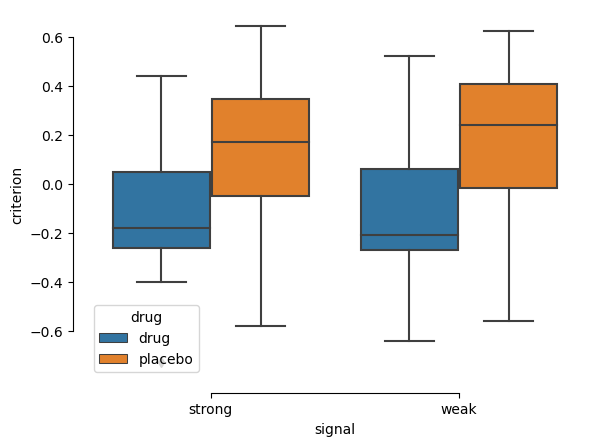

In [93]:
sns.boxplot(x="signal", y="criterion", hue="drug",
            data=res.reset_index())
sns.despine(offset=10, trim=True)

aov = AnovaRM(res.reset_index(), 'criterion', 'subj_idx', within=['signal', 'drug']).fit()
print(aov)

In a scatter plot, plot subject's choice bias (criterion) on placebo sessions versus the change in bias for drug compared to placebo. Print the correlation coefficient.

(-0.7298431023821867, 0.00025953333410801117)


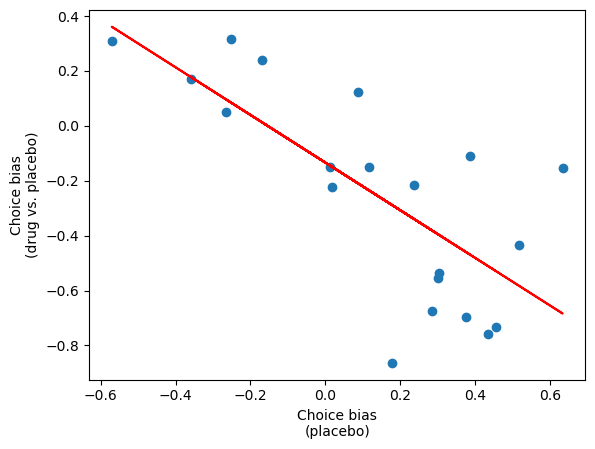

In [109]:
res_placebo = df.loc[df['drug']=='placebo'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
res_drug = df.loc[df['drug']=='drug'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
res = pd.concat([res_placebo,
                (res_drug-res_placebo)],
                axis=1)
res.columns = ['d-prime', 'criterion', 'd-prime_diff', 'criterion_diff']

plt.scatter(res['criterion'], res['criterion_diff'])

# calc the trendline
x,y = res['criterion'], res['criterion_diff']
coefs = np.polyfit(x, y, 1)
poly = np.poly1d(coefs)
plt.plot(x, poly(x), "r")

# sns.regplot(x='criterion', y='criterion_diff', data=res)

plt.xlabel('Choice bias\n(placebo)')
plt.ylabel('Choice bias\n(drug vs. placebo)')
print(sp.stats.pearsonr(res['criterion'], res['criterion_diff']))

Let's add 95% confidence intervals. You will need to bootstrap (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) those. You can use 

```df.groupby(['subj_idx', 'drug']).sample(frac=1, replace=True)``` 

to resample your dataframe.

Text(0, 0.5, 'Choice bias\n(drug vs. placebo)')

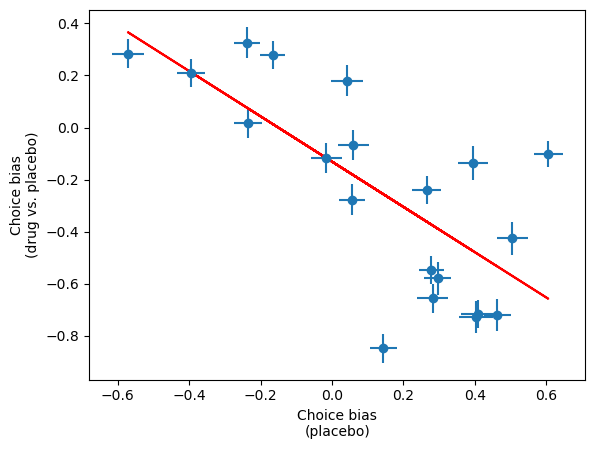

In [132]:
def compute_measures(df):
    res_placebo = df.loc[df['drug']=='placebo'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
    res_drug = df.loc[df['drug']=='drug'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
    res = pd.concat([res_placebo,
                    (res_drug -  res_placebo)],
                    axis=1)
    res.columns = ['d-prime', 'criterion', 'd-prime_diff', 'criterion_diff']
    return res

# perform n bootstraps:
n = 100
res_boot = []
for i in range(n):
    res = compute_measures(df = df.groupby(['subj_idx', 'drug']).sample(frac=1, replace=True))
    res['boot'] = i
    res_boot.append(res)
res_boot
res_boot = pd.concat(res_boot)
    
# confidence interval:
ci = (res_boot.groupby(['subj_idx']).quantile(0.975)-
    res_boot.groupby(['subj_idx']).quantile(0.025))

# plot:
plt.errorbar(x=res['criterion'], y=res['criterion_diff'], 
             xerr=ci['criterion']/2, yerr=ci['criterion_diff']/2,
            fmt='o')

# calc the trendline
x,y = res['criterion'], res['criterion_diff']
coefs = np.polyfit(x, y, 1)
poly = np.poly1d(coefs)
plt.plot(x, poly(x), "r")

plt.xlabel('Choice bias\n(placebo)')
plt.ylabel('Choice bias\n(drug vs. placebo)')

In [244]:
a = np.random.normal(0,1,100)
x = a[:-1]
y = a[1:]-a[:-1]
sp.stats.pearsonr(x,y)

# plt.plot(a)

(-0.7636209390851022, 3.909897879561378e-20)

This across subject's correlation looks compelling! The conservative subjects (postive on x) get less conservative when taking the drug (negative on y), and the liberal subjects (negative on x) get less liberal when taking the drug (positive on y). Can we conclude that this drug reduces subject's choice bias, irrespective of it's sign?

We have to be very aware of regression towards the mean: the phenomenon where if one sample of a random variable is extreme, the next sampling of the same random variable is likely to be closer to its mean (https://en.wikipedia.org/wiki/Regression_toward_the_mean).

We can correct for this with a permutation test. You can do this by computing the same across-subject correlation 10K times, each time using randomly assigned “placebo” vs “drug” labels of each subject. Then one can comapre the observed correlation coefficient (reflecting the combined effects of regression to the mean and the true relationship) against this permutation distribution.

Implement this analysis.

Text(0, 0.5, '# observations')

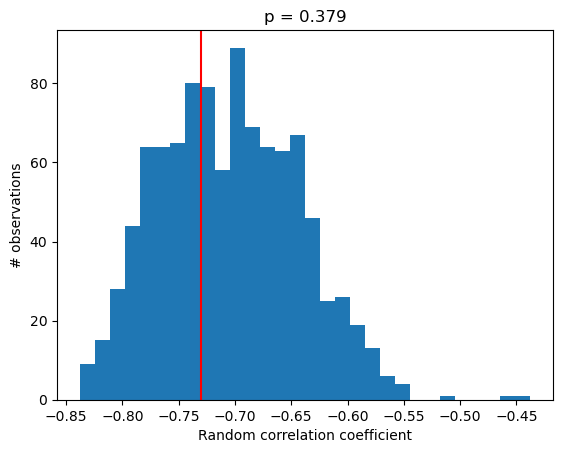

In [245]:
def permutationTest_correlation(x1, x2, nrand=1000):
    rng = np.random.default_rng()
    data = np.vstack((x1,x2)).T
    corrrand = np.zeros(nrand)
    for i in range(nrand):
        data = rng.permuted(data, axis=1)
        corrrand[i] = sp.stats.pearsonr(data[:,0], data[:,1]-data[:,0])[0]    
    truecorr = sp.stats.pearsonr(x1, x2-x1)[0]
    p_value = (abs(corrrand) >= abs(truecorr)).mean()
    return truecorr, corrrand, p_value

# do permuation test:
res_placebo = df.loc[df['drug']=='placebo'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
res_placebo.columns = ['d-prime', 'criterion']
res_drug = df.loc[df['drug']=='drug'].groupby(['subj_idx']).apply(sdt).apply(pd.Series)
res_drug.columns = ['d-prime', 'criterion']
truecorr, corrrand, p_value = permutationTest_correlation(res_placebo['criterion'], res_drug['criterion'])

# plot results permuation test:
plt.hist(corrrand, bins=30)
plt.axvline(truecorr, color='r')
plt.title('p = {}'.format(round(p_value,3)))
plt.xlabel('Random correlation coefficient')
plt.ylabel('# observations')